In [274]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [275]:
train_df=pd.read_csv('train.csv')

In [276]:
pd.set_option('display.max_columns',None)

In [277]:
train_df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [278]:
train_df.isna().sum()

id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64

In [279]:
df1=train_df.copy()

In [280]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [281]:
numerical_cols=list(df1.drop(columns=['id']).select_dtypes(include='number'))
categroical_cols=list(df1.drop(columns=['id']).select_dtypes('object'))
print(numerical_cols)
print(categroical_cols)

['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
['Stage_fear', 'Drained_after_socializing', 'Personality']


In [282]:

px.box(df1,y='Time_spent_Alone',color='Personality')

In [283]:

px.box(df1,y='Social_event_attendance',color='Personality')

In [284]:
px.box(df1,y='Going_outside',color='Personality')

In [285]:
px.box(df1,y='Friends_circle_size',color='Personality')

In [286]:
px.box(df1,y='Post_frequency',color='Personality')

In [287]:
px.bar(df1.groupby(['Stage_fear','Personality'])['id'].count().reset_index().rename(columns={'id':'count'}),y='count',x='Stage_fear',color='Personality')

In [288]:
px.bar(df1.groupby(['Drained_after_socializing','Personality']).size().reset_index().rename(columns={0:'count'}),y='count',x='Drained_after_socializing',color='Personality')

In [289]:
df1.head(1)

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert


In [290]:
df1.isna().sum()

id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64

In [291]:
invt_df=df1.loc[df1['Personality']=='Introvert']
exvt_df=df1.loc[df1['Personality']=='Extrovert']

In [292]:
from sklearn.impute import KNNImputer
knn=KNNImputer(n_neighbors=3)

In [293]:
invt_df[numerical_cols]=knn.fit_transform(invt_df[numerical_cols])

C:\Users\sair4\AppData\Local\Temp\ipykernel_17624\1598696005.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [294]:
invt_df[numerical_cols].isna().sum()[invt_df[numerical_cols].isna().sum()!=0]

Series([], dtype: int64)

In [295]:
exvt_df[numerical_cols]=knn.fit_transform(exvt_df[numerical_cols])

C:\Users\sair4\AppData\Local\Temp\ipykernel_17624\3628689071.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [296]:
exvt_df[numerical_cols].isna().sum()[exvt_df[numerical_cols].isna().sum()!=0]

Series([], dtype: int64)

In [297]:
from sklearn.impute import SimpleImputer
si_mode=SimpleImputer(strategy='most_frequent')

In [298]:
print(categroical_cols)

['Stage_fear', 'Drained_after_socializing', 'Personality']


In [299]:
tbcc=['Stage_fear','Drained_after_socializing']

In [300]:
exvt_df[tbcc]=si_mode.fit_transform(exvt_df[tbcc])
invt_df[tbcc]=si_mode.fit_transform(invt_df[tbcc])

C:\Users\sair4\AppData\Local\Temp\ipykernel_17624\2423016364.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\sair4\AppData\Local\Temp\ipykernel_17624\2423016364.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [301]:
exvt_df.isna().sum()[exvt_df.isna().sum()!=0]

Series([], dtype: int64)

In [302]:
invt_df.isna().sum()[invt_df.isna().sum()!=0]

Series([], dtype: int64)

In [303]:
invt_df.head(1)

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
2,2,6.0,Yes,1.0,0.0,Yes,3.0,0.0,Introvert


In [304]:
combinded_df=pd.concat([invt_df,exvt_df])
combinded_df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
2,2,6.0,Yes,1.0,0.0,Yes,3.0,0.0,Introvert
8,8,4.0,Yes,2.0,1.0,Yes,0.0,2.0,Introvert
17,17,5.0,Yes,0.0,4.0,Yes,2.0,0.0,Introvert
21,21,6.0,Yes,3.0,2.0,Yes,1.0,3.0,Introvert
22,22,4.0,Yes,0.0,1.0,Yes,2.0,0.0,Introvert


In [305]:
fin_df=combinded_df.sort_values('id',ascending=True)

In [306]:
fin_df.isna().sum()

id                           0
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [307]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [308]:
for i in range(len(categroical_cols)):
    fin_df[categroical_cols[i]]=le.fit_transform(df1[categroical_cols[i]])

In [309]:
train_df[categroical_cols].head(1)

,Stage_fear,Drained_after_socializing,Personality
0,No,No,Extrovert


In [310]:
fin_df[categroical_cols].head(1)

,Stage_fear,Drained_after_socializing,Personality
0,0,0,0


In [311]:
train_df.head(1)

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert


In [312]:
fin_df.head(1)

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,0,6.0,4.0,0,15.0,5.0,0


In [313]:
fin_df['isAmbivert']=1

In [314]:
fin_df.loc[(fin_df['Drained_after_socializing']==0) & (fin_df['Stage_fear']==0),'isAmbivert']=0

In [315]:
fin_df.loc[(fin_df['Stage_fear']==0) & (fin_df['Personality']==1)]

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,isAmbivert
124,124,4.000000,0,7.0,6.0,0,11.0,3.0,1,0
149,149,0.000000,0,4.0,6.0,0,12.0,3.0,1,0
245,245,10.000000,0,3.0,5.0,0,5.0,4.0,1,0
272,272,4.000000,0,5.0,3.0,0,12.0,3.0,1,0
285,285,4.333333,0,9.0,5.0,0,12.0,6.0,1,0
...,...,...,...,...,...,...,...,...,...,...
17992,17992,0.333333,0,7.0,4.0,0,11.0,3.0,1,0
18276,18276,0.000000,0,9.0,5.0,0,10.0,9.0,1,0
18312,18312,0.000000,0,5.0,6.0,0,15.0,9.0,1,0
18443,18443,1.666667,0,7.0,4.0,0,9.0,4.0,1,0


<Axes: >

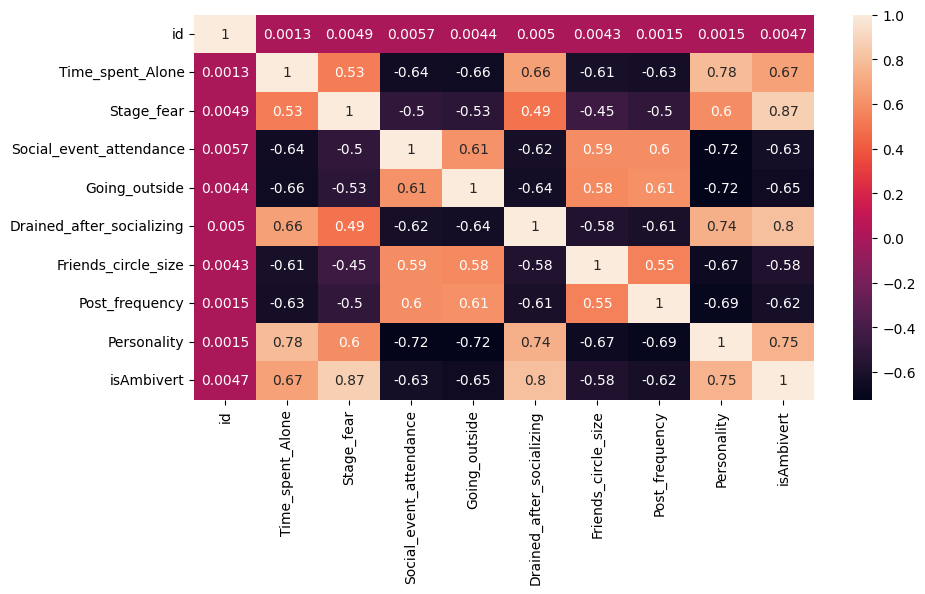

In [316]:
plt.figure(figsize=(10,5))
sns.heatmap(fin_df.corr(),annot=True)

In [317]:
(0.6+0.74)/2

0.6699999999999999

In [318]:
fin_df.to_csv('final.csv')

In [319]:
input_cols=list(fin_df.drop(columns='Personality'))
target_col='Personality'
print(input_cols)

['id', 'Time_spent_Alone', 'Stage_fear', 'Social_event_attendance', 'Going_outside', 'Drained_after_socializing', 'Friends_circle_size', 'Post_frequency', 'isAmbivert']


In [320]:
x=fin_df[input_cols]
y=fin_df[target_col]

In [321]:
from sklearn.model_selection import train_test_split
x_train,x_val_test,y_train,y_val_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_test,x_val,y_test,y_val=train_test_split(x_val_test,y_val_test,test_size=0.5,random_state=42)

In [322]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=5,max_features='sqrt',n_estimators=500)
rf.fit(x_train,y_train)

,n_estimators,500
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [323]:
print('validataion_score:',rf.score(x_val,y_val))
print('Test_score:',rf.score(x_test,y_test))

validataion_score: 0.9665347247211227
Test_score: 0.9686937747391148


In [324]:
def check_scr(md):
    rf.fit(x_train,y_train)
    val_error=1-rf.score(x_val,y_val)
    test_error=1-rf.score(x_test,y_test)
    return {'max_depth':md,'validation_error':val_error,'test_error':test_error}

In [325]:
mdl=[]
vel=[]
tel=[]
for i in range(1,21):
    a=check_scr(i)
    mdl.append(a['max_depth'])
    vel.append(a['validation_error'])
    tel.append(a['test_error'])

In [326]:
dic={'MaxDepth':mdl,'TrainingError':tel,'ValidationError':vel}
info_df=pd.DataFrame(dic)
info_df

,MaxDepth,TrainingError,ValidationError
0,1,0.031306,0.033465
1,2,0.031306,0.033825
2,3,0.031306,0.033465
3,4,0.031306,0.033465
4,5,0.031306,0.033825
5,6,0.031306,0.033825
6,7,0.031306,0.033825
7,8,0.031306,0.033825
8,9,0.031306,0.033465
9,10,0.031306,0.033825


<Axes: xlabel='MaxDepth', ylabel='TrainingError'>

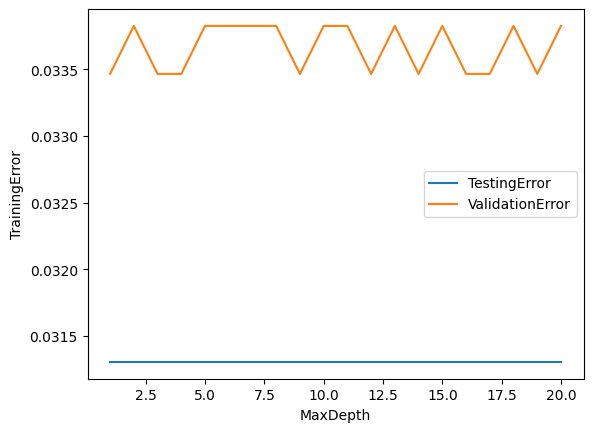

In [327]:
sns.lineplot(info_df,x='MaxDepth',y='TrainingError',label='TestingError')
sns.lineplot(info_df,x='MaxDepth',y='ValidationError',label='ValidationError')

In [328]:
from sklearn.model_selection import GridSearchCV
rf_grid=RandomForestClassifier(random_state=42)

In [329]:
param_grid_={
    'n_estimators':[100,200,300,500],
    'max_depth':[5,6,7,8,10,12,16],
    'max_features':['auto','sqrt']
}

In [330]:
grid_search=GridSearchCV(
    estimator=rf_grid,
    param_grid=param_grid_,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

In [ ]:
grid_search.fit(x_train,y_train)

In [332]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.9696130171944454
{'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 200}


In [333]:
import xgboost as xgb
from xgboost import XGBClassifier
xgb_=XGBClassifier(learning_rate= 0.01, max_depth= 3, n_estimators= 500, subsample= 0.2)
xgb_.fit(x_train,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [334]:
xgb_.score(x_test,y_test)

0.9694134580784455

In [343]:
param_grid_xgb={
    'n_estimators':[50,100,200,500,1000],
    'max_depth':[3,5,7,9,12],
    'learning_rate':[0.01,0.1,0.2],
    'subsample':[0.8,0.2,0.6]
}

In [344]:
model_xgb=XGBClassifier(use_label_encoder=False,eval_metric='logloss',random_state=42)
grid_search_xgb=GridSearchCV(
    estimator=model_xgb,
    param_grid=param_grid_xgb,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

In [345]:
grid_search_xgb.fit(x_train,y_train)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'learning_rate': [0.01, 0.1, ...], 'max_depth': [3, 5, ...], 'n_estimators': [50, 100, ...], 'subsample': [0.8, 0.2, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [346]:
print(grid_search_xgb.best_params_)
print(grid_search_xgb.best_score_)

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.2}
0.9698443202013843
